In [13]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1)/255 # 28,28,1 을 준 이유 RGB 흑백이라 1 , 칼라면 3

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [14]:
#인공신경망 모델 구축
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same',input_shape= (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
# 인공 신경망 도화지
# CNN층 32개의 도장 특징 , 옷그림에서 특징을 잡으려고 하는데 특징의 가로세로 깅이가 3, 패딩도장 찍을때 도장이 밖으로 나가면서 까지 특징 잡도록해서 원래 이미지랑 사이즈가 똑같도록 하는 것이 same
# 사진 사이즈를 줄이는데 2배로 줄인다

# 2배로 줄인그데이터를 컴퓨터가 학습하기 좋게 일자로 
# 100개의 은닉층 보내고
# 40%를 끄고
# 10개의 출력층을 켜서 Softmax로 마무리


Epoch 1/100
1500/1500 [==============================] - 36s 24ms/step - loss: 0.4868 - accuracy: 0.8288 - val_loss: 0.3173 - val_accuracy: 0.8855
Epoch 2/100
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3330 - accuracy: 0.8813 - val_loss: 0.2847 - val_accuracy: 0.8960
Epoch 3/100
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2961 - accuracy: 0.8935 - val_loss: 0.2664 - val_accuracy: 0.9014
Epoch 4/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2666 - accuracy: 0.9019 - val_loss: 0.2648 - val_accuracy: 0.9059
Epoch 5/100
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2486 - accuracy: 0.9098 - val_loss: 0.2489 - val_accuracy: 0.9114
Epoch 6/100
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2284 - accuracy: 0.9142 - val_loss: 0.2501 - val_accuracy: 0.9137


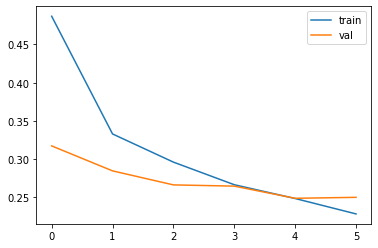

In [15]:
# 어떻게 학습해야할지

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam') # 러닝 메이트 발 보폭수 0.1 곱해서 미분값 곱했는데 그 보폭수를 두정 하는것. adam 이 가장 좋다는 최적화 함수, 일이사 조정

check_point = keras.callbacks.ModelCheckpoint('best.h5') 
early_stopping = keras.callbacks.EarlyStopping(patience =1, restore_best_weights=True)

history = model.fit(train_scaled,train_target,epochs=100
                    ,validation_data=(val_scaled,val_target),callbacks=[check_point,early_stopping])

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [ ]:
 # 원래 patience =10 정도로 하고 최종 정확도 91% 정도